# Setting up input parameters
 
Nobook is designed/Tested to run on IBM Datascience Plaotform (DSX), PowerAI and local installation, on each platfom input training **train_indessa.csv** data and test data **test_indessa** is stored 
 1. Object Storage in case of DSX 
 2. Nibmix file manager in case of Power AI on nimbix
 3. Custome directory in case of Local
 
 **Below set of featured used**
 * Saving the model as check point at regular intervel
 * Creating Tensor Board logs for Network Analysis
 * Applied Mini Batch Gradient Descent
 * Traing data Standardization/Normalization
 * Learning rate decay
 * Continous graph of loss, train accuracy,, test accuracy and total accuracy

# Inputs to the Neural Network

1. **test_size** : splitting dataset in train and test, ginving size as .1 means train would be 90% and test would be 10%.
2. layers_neurons_input = {
    'L1': 300,
    'L2': 200,
    'L3': 100,}
    
 L1-L3 are the layers and numbers in front is the number of neurons in each layer, user can add new layers say     L5, L6,L7
 
 For exmaple if user adds three new layers it shoud be like below
 
 layers_neurons_input = {
    'L1': 500,
    'L2': 400,
    'L3': 300,
    'L4': 200,
    'L5': 100,
    'L6': 50,
 }
3. **batch_size**: Define the batch size for the Mini Batch Gradient Descent, pow(2,4) mean 16.
4. **hm_epochs**: How many epocs/iteration for training.
5. **activation_function** : Which activation function to use at output layer, all inner layers are using relu activation function
    *softmax
    *sigmoid
6. **cost_function** : Define cost/loss function use either of three 
    *softmax_cross_entropy_with_logits
    *reduce_sum
    *RMSE
7. **base_learning_rate** : Have used learning rate decay approach in learning rate decayed as the training progress, we have to define the starting/base learning rate to start from.
8. **decay_rate** : Decay Rate
9. **iterations_save_model**: No. of iteration to save the model.
10. **no_of_training_records**: No of trainng records selected for traing 1000 mean top 1000 records will send for training, put -1 for all records.

# Data load from Bluemix Object storage

DSX has a OOM issue while processing huge data, so keep the data size till 1L only for development porpose


In [4]:
#This is installation is required for first time run on POWER AI, as these libraries are not present by default.
!pip install --upgrade pip
!pip install -U ibm-cos-sdk
!pip install pandas
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_68532bd96dbe4c248d749a8b6524f1de = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZvQ7-fsxLoo-VnMlB9H9lyK5OErBD9L4BRYZLEWCBmJ',
    ibm_service_instance_id="iam-ServiceId-bfb58159-c1e0-401d-8326-c9675ae266d0",
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_68532bd96dbe4c248d749a8b6524f1de.get_object(Bucket='cognitivebanking5320a88bf4c74dd5bbff58f004b5577b',Key='train_indessa.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataframe = pd.read_csv(body)
dataframe = dataframe.head(no_of_training_records)
dataframe

Requirement already up-to-date: pip in c:\users\arsha\anaconda3\envs\tensorflow\lib\site-packages
^C


ImportError: No module named 'botocore'

# Data load from Nimbix File Manager

Update the **username**, **password** and **traning url** for the current nimbix file manager instance

In [ ]:
import urllib2
import base64

username = "nimbix"
password = "MaSI6jdOpZ0UtNu"
request = urllib2.Request("https://nae-165-254-189-6.broker.jarvice.com/owncloud/remote.php/webdav/CognitiveBanking/data/train.csv")
base64string = base64.encodestring('%s:%s' % (username, password)).replace('\n', '')
request.add_header("Authorization", "Basic %s" % base64string)
response = urllib2.urlopen(request)
dataframe = pd.read_csv(response)
dataframe = dataframe.head(no_of_training_records)
dataframe

In [1]:
test_size = .1
layers_neurons_input ={
    'L1': 200,
    'L2': 100
}
batch_size = pow(2,7)
hm_epochs = 200000
activation_function = 'softmax' 
cost_function = 'softmax_cross_entropy_with_logits'        
base_learning_rate = .0001
decay_rate = .95
iterations_save_model = 1000
no_of_training_records = 100000 # -1 for all recods in the inputs

# Data load from Local File System

Update the correct file_path from local machine

In [2]:
import pandas as pd
file_path = 'D:/Arshad/CognitiveBanking/Data/train.csv'
dataframe = pd.read_csv(file_path)
dataframe = dataframe.head(no_of_training_records)
dataframe

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
5,10247268,15000,15000,14950.0,36 months,BAT2575549,8.90,A,A5,Design Consultant,...,0.0,NaN,INDIVIDUAL,NaN,113th week,0.0,0.0,350619.0,29500.0,0
6,8089625,5000,5000,4975.0,36 months,,7.90,A,A4,TOYOTA OF NORTH HOLLYWOOD,...,0.0,NaN,INDIVIDUAL,NaN,117th week,0.0,1023.0,13272.0,55500.0,1
7,23043116,6000,6000,6000.0,36 months,NaN,9.17,B,B1,Banker,...,0.0,54.0,INDIVIDUAL,NaN,78th week,0.0,0.0,272579.0,11800.0,0
8,45900933,6000,6000,6000.0,36 months,BAT4136152,13.99,C,C4,LVN,...,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,281521.0,62100.0,0
9,41272507,34550,34550,34550.0,60 months,BAT4694572,17.14,D,D4,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,52th week,0.0,0.0,76034.0,33200.0,0


# Creating directory for storing Saved Model and Tensorboard logs

In [3]:
import os
import shutil
from os.path import expanduser
modelDir = expanduser("~")+'/model'
tbDir = expanduser("~")+'/tb'

if os.path.exists(modelDir):
    shutil.rmtree(modelDir) 
    os.makedirs(modelDir)
else:
    os.makedirs(modelDir)
print(os.listdir(modelDir))
modelPath = modelDir+'/model.ckpt'


if os.path.exists(tbDir):
    shutil.rmtree(tbDir) 
    os.makedirs(tbDir)
else:
    os.makedirs(tbDir)
tb_logs_path = tbDir

[]


In [4]:
#This is installation is required for first time run on POWER AI, as these libraries are not present by default.
!pip install sklearn
!pip install scipy 

#Splitting the data in train and test set
from sklearn.model_selection import train_test_split
traindf, testdf = train_test_split(dataframe, test_size=test_size)

In [5]:
dataframe.loc[:, ("y1")] = dataframe.loc[:, ("loan_status")]
dataframe.loc[:, ("y2")] = dataframe["y1"] == 0           # y2 is the negation of y1
dataframe.loc[:, ("y2")] = dataframe["y2"].astype(int)    # Turn TRUE/FALSE values into 1/0


traindf.loc[:, ("y1")] = traindf.loc[:, ("loan_status")]
traindf.loc[:, ("y2")] = traindf["y1"] == 0           # y2 is the negation of y1
traindf.loc[:, ("y2")] = traindf["y2"].astype(int)    # Turn TRUE/FALSE values into 1/0


testdf.loc[:, ("y1")] = testdf.loc[:, ("loan_status")]
testdf.loc[:, ("y2")] = testdf["y1"] == 0           # y2 is the negation of y1
testdf.loc[:, ("y2")] = testdf["y2"].astype(int)    # Turn TRUE/FALSE values into 1/0


C:\Users\arsha\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\arsha\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
#This mthod is Standardizing the inputs to zero mean between 0-1
from sklearn.preprocessing import MinMaxScaler
def min_max_scale_normalization(df):
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Filter the required columns
Create three datasets, **train**,**test** and **complete** datasets with required features 

In [7]:
df = dataframe.loc[:, ['loan_amnt',
                           'funded_amnt',
                           'funded_amnt_inv', 
                           'int_rate',
                           'annual_inc', 
                           'dti',
                           'open_acc', 
                           'revol_bal',
                           'revol_util', 
                           'total_acc',
                           'total_rec_int', 
                           'tot_cur_bal',
                           'total_rev_hi_lim',
                           'y1',
                           'y2']].dropna()


#df = min_max_scale_normalization(df)

inputX = df.loc[:, ['loan_amnt',
                           'funded_amnt',
                           'funded_amnt_inv', 
                           'int_rate',
                           'annual_inc', 
                           'dti',
                           'open_acc', 
                           'revol_bal',
                           'revol_util', 
                           'total_acc',
                           'total_rec_int', 
                           'tot_cur_bal',
                           'total_rev_hi_lim'
                           ]].as_matrix()

inputY = df.loc[:, ["y1","y2"]].as_matrix()

print('Complete Dataset')
print(inputX.shape)
print(inputY.shape)
print('\n')

traindf = traindf.loc[:, ['loan_amnt',
                           'funded_amnt',
                           'funded_amnt_inv', 
                           'int_rate',
                           'annual_inc', 
                           'dti',
                           'open_acc', 
                           'revol_bal',
                           'revol_util', 
                           'total_acc',
                           'total_rec_int', 
                           'tot_cur_bal',
                           'total_rev_hi_lim',
                           'y1',
                           'y2']].dropna()


#traindf = min_max_scale_normalization(traindf)

inputXtrain = traindf.loc[:, ['loan_amnt',
                           'funded_amnt',
                           'funded_amnt_inv', 
                           'int_rate',
                           'annual_inc', 
                           'dti',
                           'open_acc', 
                           'revol_bal',
                           'revol_util', 
                           'total_acc',
                           'total_rec_int', 
                           'tot_cur_bal',
                           'total_rev_hi_lim'
                           ]].as_matrix()

inputYtrain = traindf.loc[:, ["y1","y2"]].as_matrix()
print('Traning Dataset')
print(inputXtrain.shape)
print(inputYtrain.shape)
print('\n')


testdf = testdf.loc[:, ['loan_amnt',
                           'funded_amnt',
                           'funded_amnt_inv', 
                           'int_rate',
                           'annual_inc', 
                           'dti',
                           'open_acc', 
                           'revol_bal',
                           'revol_util', 
                           'total_acc',
                           'total_rec_int', 
                           'tot_cur_bal',
                           'total_rev_hi_lim',
                           'y1',
                           'y2']].dropna()

#testdf = min_max_scale_normalization(testdf)


inputXtest = testdf.loc[:, ['loan_amnt',
                           'funded_amnt',
                           'funded_amnt_inv', 
                           'int_rate',
                           'annual_inc', 
                           'dti',
                           'open_acc', 
                           'revol_bal',
                           'revol_util', 
                           'total_acc',
                           'total_rec_int', 
                           'tot_cur_bal',
                           'total_rev_hi_lim'
                           ]].as_matrix()

inputYtest = testdf.loc[:, ["y1","y2"]].as_matrix()

print('Test Dataset')
print(inputXtest.shape)
print(inputYtest.shape)

Complete Dataset
(92042, 13)
(92042, 2)


Traning Dataset
(82854, 13)
(82854, 2)


Test Dataset
(9188, 13)
(9188, 2)


# Creating a Neural Network

In [8]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data



#[0,1]
#with tf.name_scope('Input'):
X = tf.placeholder('float', [None, 13],name='X_Input')
Y_ = tf.placeholder('float', [None, 2],name='Y_Input')



no_of_nodes = {
    'L0': inputXtrain.shape[1],
}
no_of_nodes.update(layers_neurons_input)
no_of_nodes.update({'L'+str(len(layers_neurons_input)+1):inputYtrain.shape[1]})


no_of_layers = len(no_of_nodes)-1
W = {}
b = {}
Y = {}

#with tf.name_scope('Network'):   
for i in range(no_of_layers):
    W[i+1] = tf.Variable(tf.truncated_normal([no_of_nodes['L'+str(i)], no_of_nodes['L'+str(i+1)]], stddev=0.1),name='Weight_L'+str(i+1))
    b[i+1] = tf.Variable(tf.zeros([no_of_nodes['L'+str(i+1)]]),name='Bias_L'+str(i+1))
    print(W[i+1])
    print(b[i+1])

    if i==0:
        Y[i+1] = tf.nn.relu(tf.matmul(X, W[i+1]) + b[i+1],name='Relu_L'+str(i+1))
    elif i==no_of_layers-1:
        output = tf.matmul(Y[i], W[i+1]) + b[i+1]

        if activation_function == 'sigmoid':
            Y[i+1] = tf.nn.sigmoid(output,name='Y_Output')
        elif activation_function == 'softmax':
            Y[i+1] = tf.nn.softmax(output,name='Y_Output')#name='Softmax_L'+str(i+1),
    else:
        Y[i+1] = tf.nn.relu(tf.matmul(Y[i], W[i+1]) + b[i+1],name='Relu_L'+str(i+1))

    print(Y[i+1])

print()
    
#DO NOT DELETE, BELOW IS THE EXPANDED VIEW OF THE ABOVE DYNAMIC CREATION OF NETWORK LAYER
# layers sizes
#L0 = 13
#L1 = 500
#L2 = 500
#L3 = 500
#L4 = 500
#L5 = 2

# weights - initialized with random values from normal distribution mean=0, stddev=0.1
# output of one layer is input for the next
#W1 = tf.Variable(tf.truncated_normal([L0, L1], stddev=0.1))
#b1 = tf.Variable(tf.zeros([L1]),name="b1")

#W2 = tf.Variable(tf.truncated_normal([L1, L2], stddev=0.1))
#b2 = tf.Variable(tf.zeros([L2]),name="b2")

#W3 = tf.Variable(tf.truncated_normal([L2, L3], stddev=0.1))
#b3 = tf.Variable(tf.zeros([L3]),name="b3")

#W4 = tf.Variable(tf.truncated_normal([L3, L4], stddev=0.1))
#b4 = tf.Variable(tf.zeros([L4]),name="b4")

#W5 = tf.Variable(tf.truncated_normal([L4, L5], stddev=0.1))
#b5 = tf.Variable(tf.zeros([L5]),name="b5")

  

# Define model
#Y1 = tf.nn.relu(tf.matmul(X, W1) + b1)
#Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)
#Y3 = tf.nn.relu(tf.matmul(Y2, W3) + b3)
#Y4 = tf.nn.relu(tf.matmul(Y3, W4) + b4)
#output = tf.matmul(Y4, W5) + b5
#Y = tf.nn.sigmoid(output,name="Y")


<tf.Variable 'Weight_L1:0' shape=(13, 200) dtype=float32_ref>
<tf.Variable 'Bias_L1:0' shape=(200,) dtype=float32_ref>
Tensor("Relu_L1:0", shape=(?, 200), dtype=float32)
<tf.Variable 'Weight_L2:0' shape=(200, 100) dtype=float32_ref>
<tf.Variable 'Bias_L2:0' shape=(100,) dtype=float32_ref>
Tensor("Relu_L2:0", shape=(?, 100), dtype=float32)
<tf.Variable 'Weight_L3:0' shape=(100, 2) dtype=float32_ref>
<tf.Variable 'Bias_L3:0' shape=(2,) dtype=float32_ref>
Tensor("Y_Output:0", shape=(?, 2), dtype=float32)



# Function to create new btach
This is used for mini batches in mini batch Gradient Descent, Batach size decides type of Gradient Descent
1. if batch_size = 1 then its Stochastic Gradient descent
2. If batch_size = pow(2,n) then its Mini batch Gradient descent
3. If batch_size = inputXtrain.shape[0] then its Btach Gradient descent

In [9]:
batch_size = inputXtrain.shape[0]
def nextBatch(inputArray,batchCount):
    start = batchCount*batch_size
    end = start + batch_size
    return inputArray[start:end]

# Graph Plot Functions
Includes function to plot graph for
1. Loss w.r.y epocs
2. Train and Test accuracy w.r.t epocs
3. Total Accuracy w.r.t epocs

In [ ]:
!pip install matplotlib
import matplotlib
import numpy as np
from pylab import *
%matplotlib inline 


def lossGraph(epochCount):
    from matplotlib import pyplot as plt1
    plt1.figure(figsize=(20,5))
    plt1.plot(lossList,label='Training Loss')
    axes = plt1.gca()
    axes.set_xlim(0,epochCount)
    #plt1.text(.8,.8,'Epoch Count '+str(epochCount))
    plt1.xlabel('No of Epocs')
    plt1.ylabel('Training Loss')
    plt1.title('Trainig Loss with Epocs') 
    plt1.grid()
    plt1.show()
    
def accuracyGraph(epochCount):
    from matplotlib import pyplot as plt2
    plt2.figure(figsize=(20,5))
    plt2.plot(trainAccuracyList, color='red', label='Train Accuracy')
    plt2.plot(testAccuracyList, color='blue', label='Test Accuracy')
    axes = plt.gca()
    axes.set_ylim([0,100])
    axes.set_xlim(0,epochCount)
    #plt2.text(.8,.8,'Epoch Count '+str(epochCount))
    plt2.xlabel('No of Epocs')
    plt2.ylabel('Accuracy')
    plt2.title('Accuracy with Epocs') 
    plt2.grid()
    plt2.show()

percentMatch = [0]
def testModel(epochCount):
    clssification = sess.run(Y[no_of_layers], feed_dict={X: inputX})
    j=0
    for i in range(clssification.shape[0]):
        if clssification[i].argmax() == inputY[i].argmax():
            j=j+1
            #graph.append(1)
        #else:
            #graph.append(0)
    if(clssification.shape[0] >0):
        percentMatch.append((j/clssification.shape[0])*100)
        print ('Total Accuracy',(j/clssification.shape[0])*100)
        plt.figure(figsize=(20,5))
        plt.plot(percentMatch)
        axes = plt.gca()
        axes.set_ylim([0,100])
        axes.set_xlim(left=0)
        #plt.text(.8,.8,'Epoch Count '+str(epochCount))
        plt.xlabel('No of Epocs')
        plt.ylabel('Total Accuracy')
        plt.title('Accuracy with Epocs') 
        plt.grid()
        plt.show()

Training started with below inputs
Test Size              : 0.1
Layers and Neurons     : {'L2': 100, 'L1': 200}
Batch Size             : 82854
Number of Epocs        : 200000
Activation Function    : softmax
Cost Function          : softmax_cross_entropy_with_logits
Base Learning Rate     : 0.0001
Decay Rate             : 0.95
Iteration Save Model   : 1000
No of Training Records : 100000


Epoch 1000 completed out of 200000 loss: 36.78894805908203 in: 0:00:48.989620 seconds Total training time elapsed: 0:00:48.989620
Train Accuracy:  [46.85712]  Test Accuracy: [46.713104]


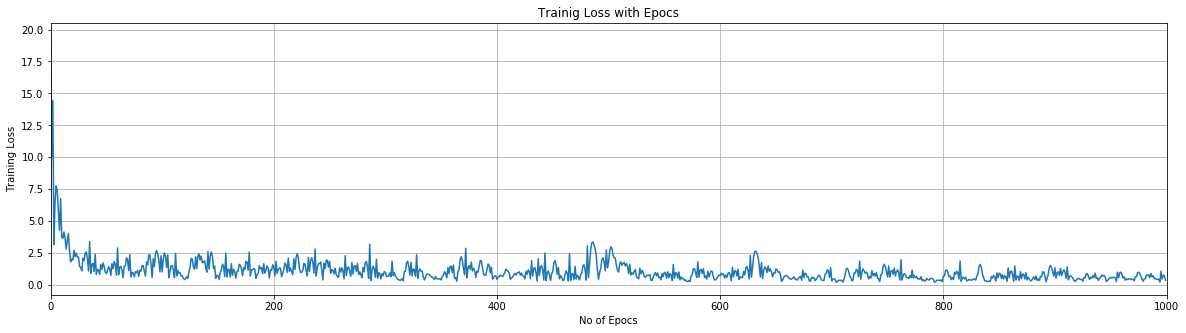

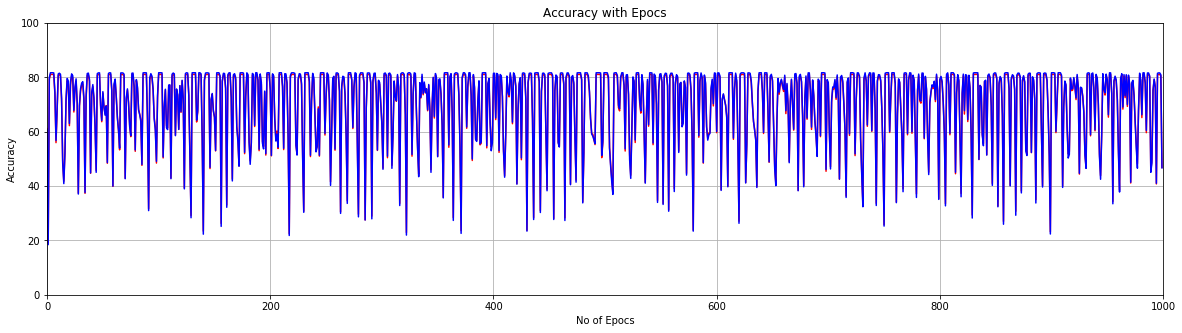

Total Accuracy 46.842745703048614


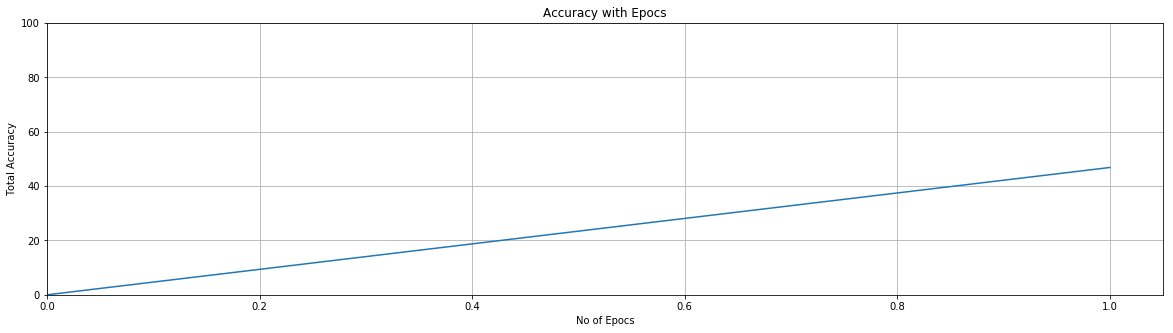

Model saved in file: C:\Users\arsha/model/model.ckpt-1000
Epoch 2000 completed out of 200000 loss: 19.514272689819336 in: 0:00:49.869633 seconds Total training time elapsed: 0:01:38.859253
Train Accuracy:  [21.945833]  Test Accuracy: [20.875055]


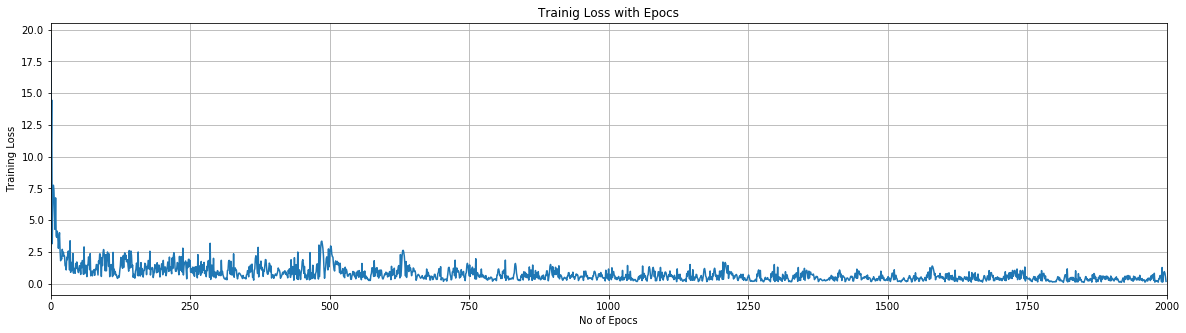

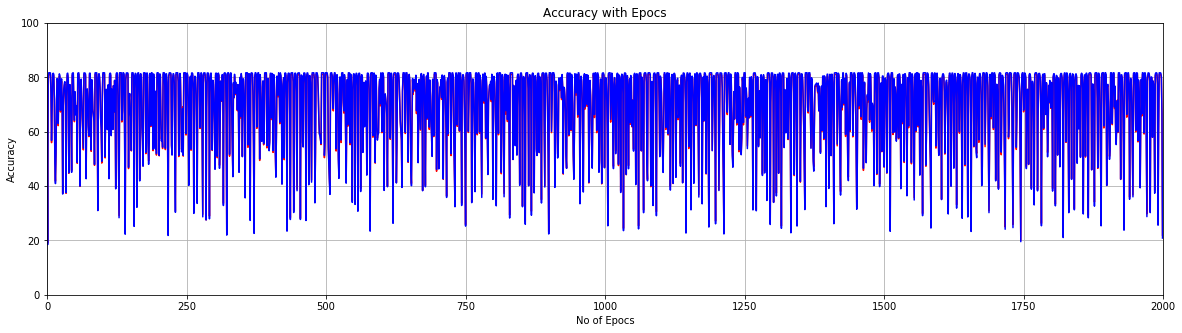

Total Accuracy 21.838943091197496


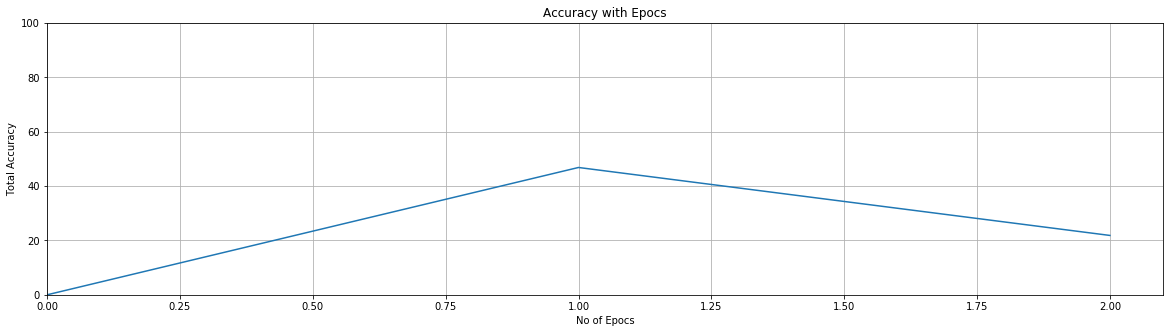

Model saved in file: C:\Users\arsha/model/model.ckpt-2000
Epoch 3000 completed out of 200000 loss: 36.6982536315918 in: 0:00:49.883530 seconds Total training time elapsed: 0:02:28.742783
Train Accuracy:  [68.031715]  Test Accuracy: [67.39225]


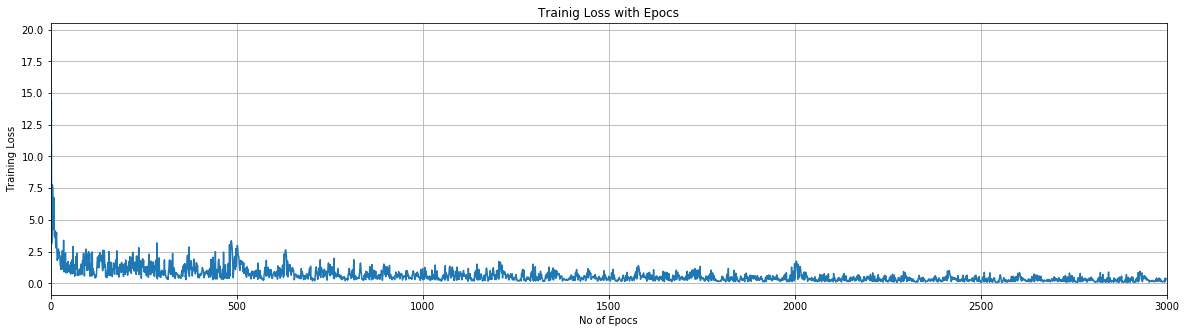

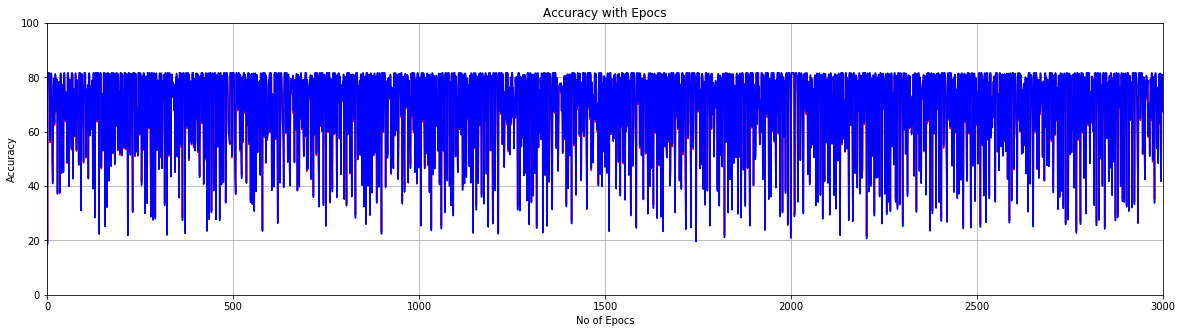

Total Accuracy 67.96788422676605


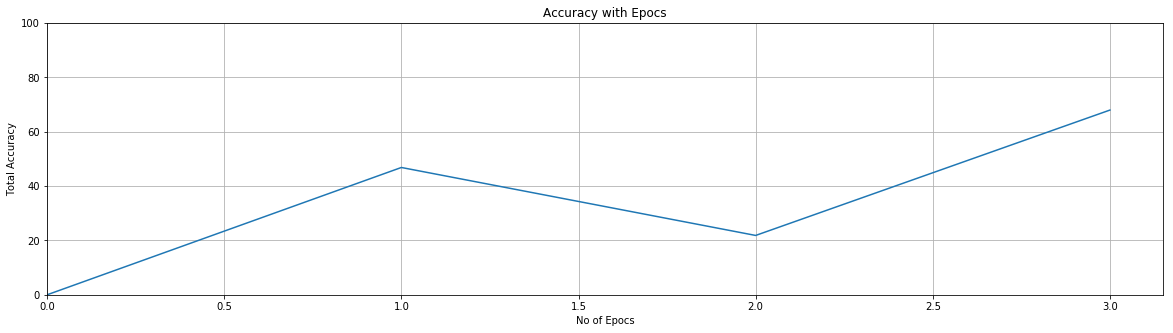

Model saved in file: C:\Users\arsha/model/model.ckpt-3000
Epoch 4000 completed out of 200000 loss: 15.47081470489502 in: 0:00:49.794025 seconds Total training time elapsed: 0:03:18.536808
Train Accuracy:  [76.00116]  Test Accuracy: [75.53331]


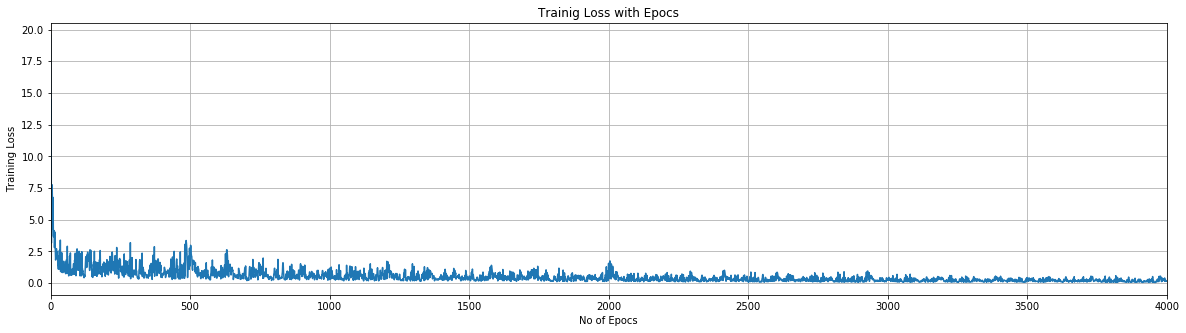

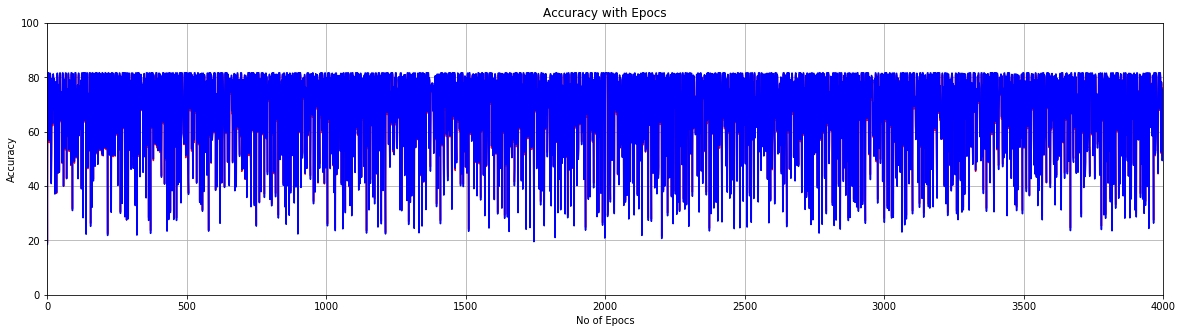

Total Accuracy 75.95445557462898


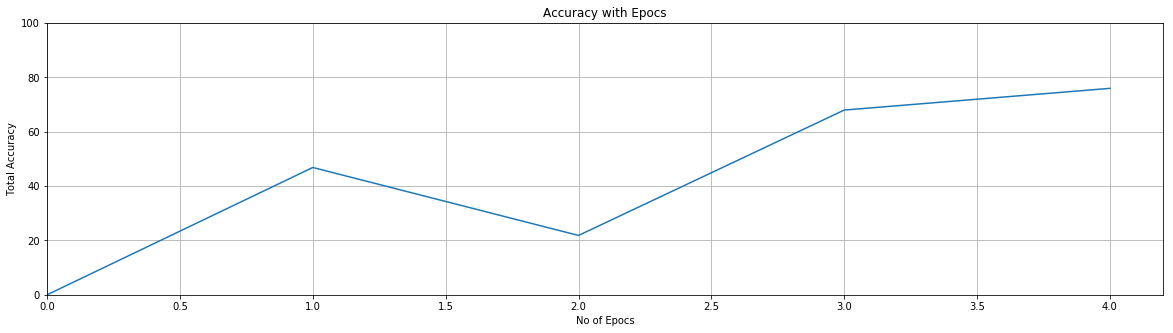

Model saved in file: C:\Users\arsha/model/model.ckpt-4000
Epoch 5000 completed out of 200000 loss: 25.51582908630371 in: 0:00:50.138321 seconds Total training time elapsed: 0:04:08.675129
Train Accuracy:  [81.059456]  Test Accuracy: [81.671745]


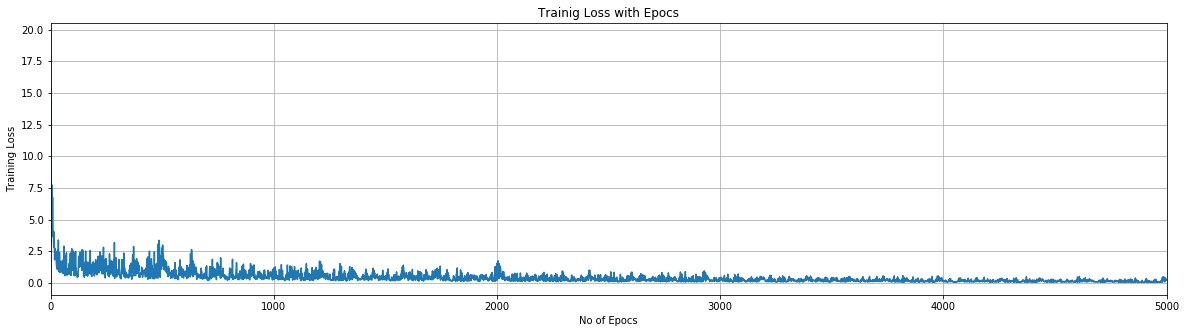

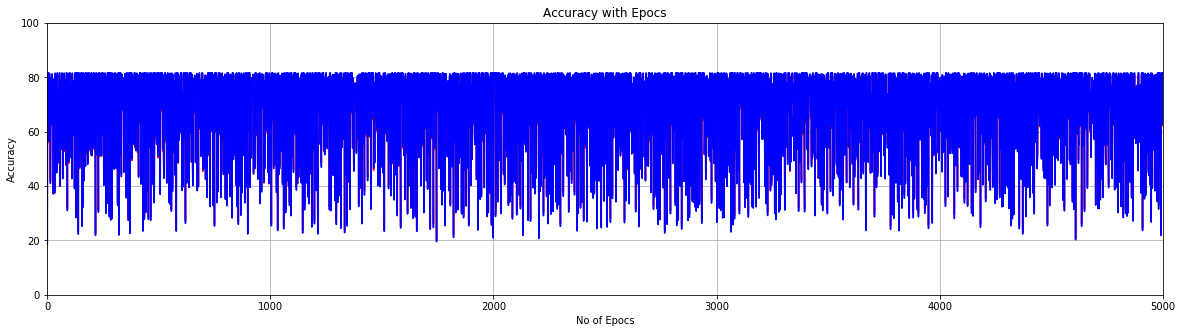

Total Accuracy 81.1205753894961


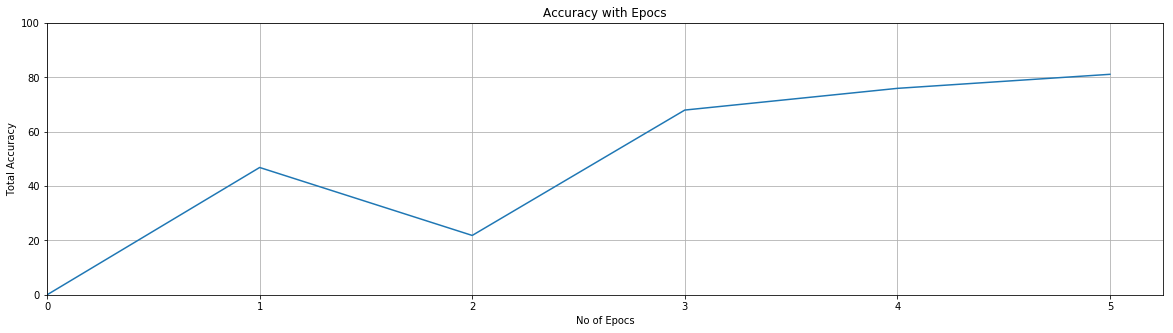

Model saved in file: C:\Users\arsha/model/model.ckpt-5000
Epoch 6000 completed out of 200000 loss: 3.422682523727417 in: 0:00:49.742079 seconds Total training time elapsed: 0:04:58.417208
Train Accuracy:  [77.134476]  Test Accuracy: [77.11145]


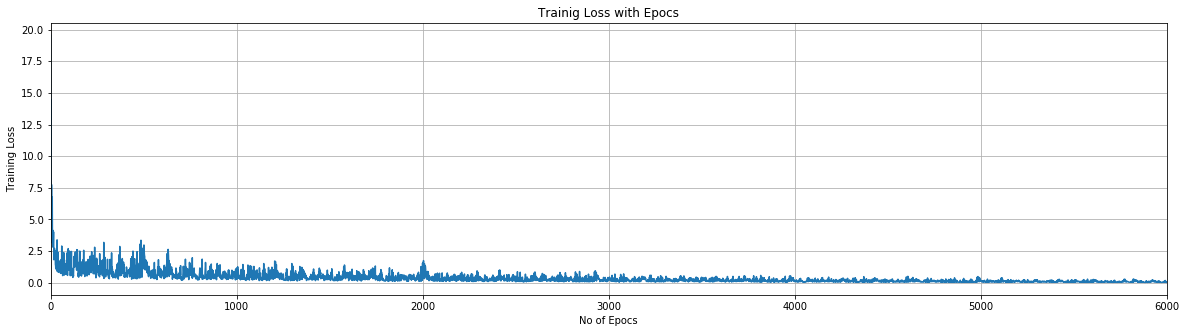

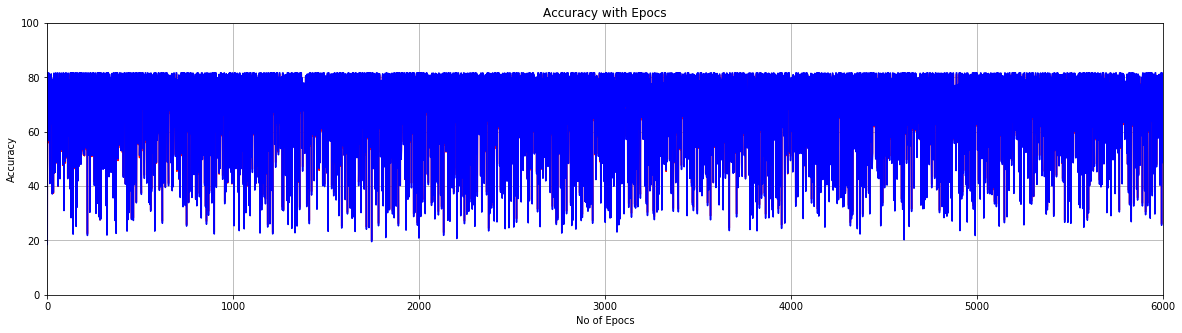

Total Accuracy 77.13217878794464


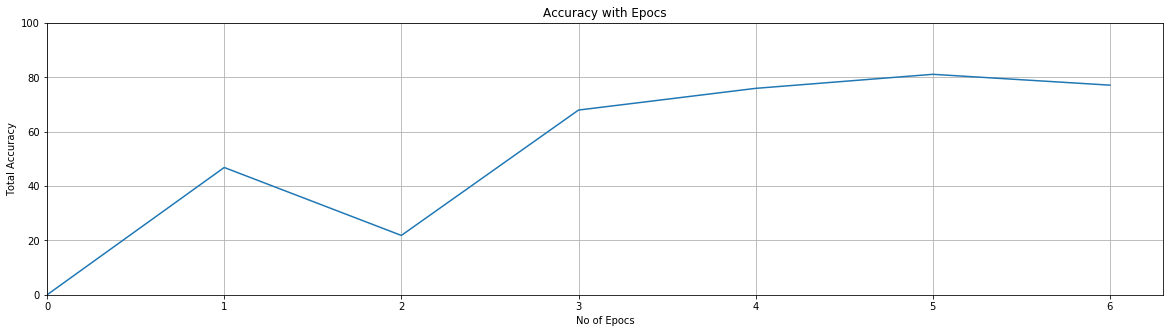

Model saved in file: C:\Users\arsha/model/model.ckpt-6000
Epoch 7000 completed out of 200000 loss: 7.243143081665039 in: 0:00:49.781771 seconds Total training time elapsed: 0:05:48.198979
Train Accuracy:  [80.583916]  Test Accuracy: [81.08402]


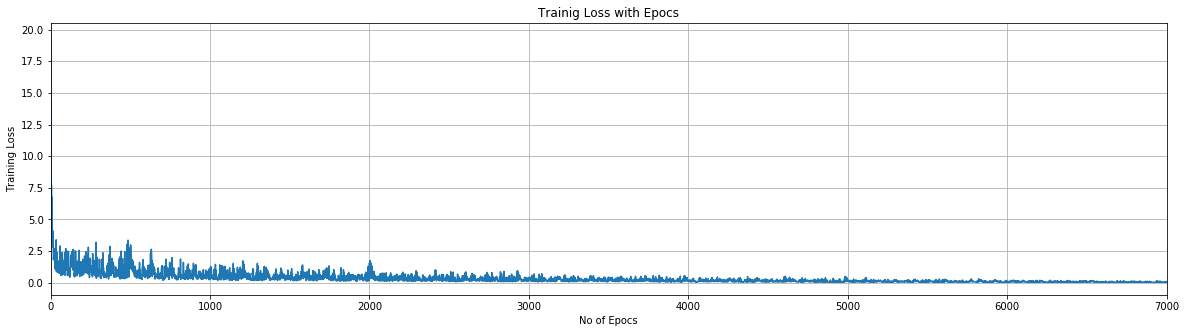

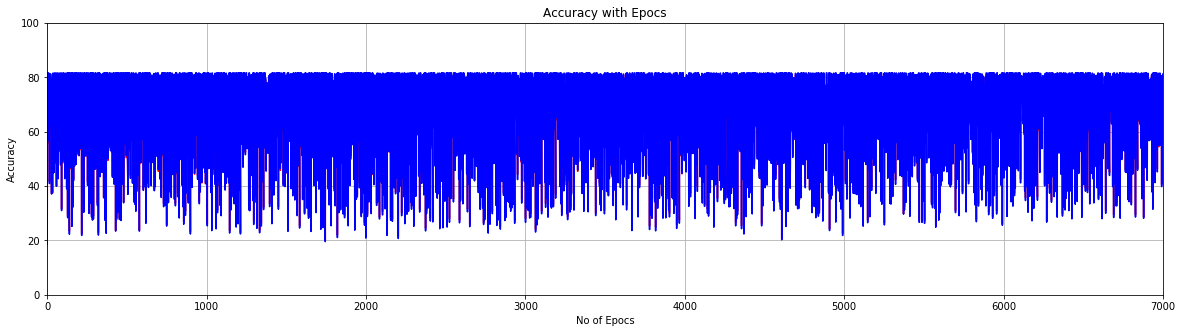

Total Accuracy 80.63384107255384


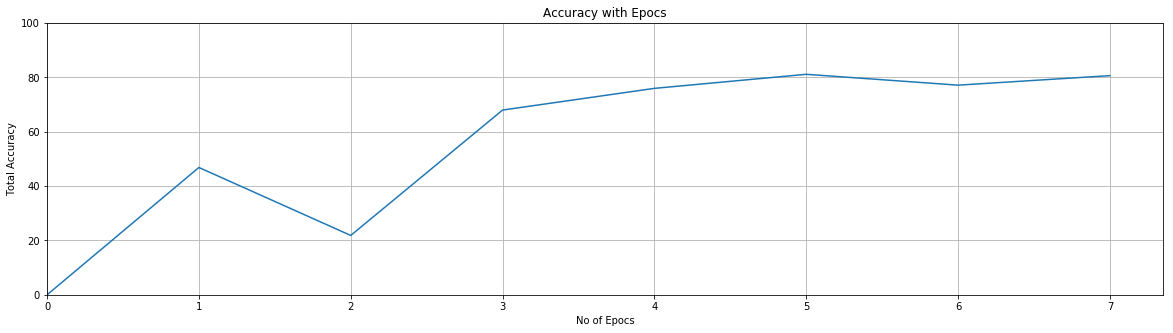

Model saved in file: C:\Users\arsha/model/model.ckpt-7000
Epoch 8000 completed out of 200000 loss: 2.3586833477020264 in: 0:00:49.718317 seconds Total training time elapsed: 0:06:37.917296
Train Accuracy:  [80.843414]  Test Accuracy: [81.34523]


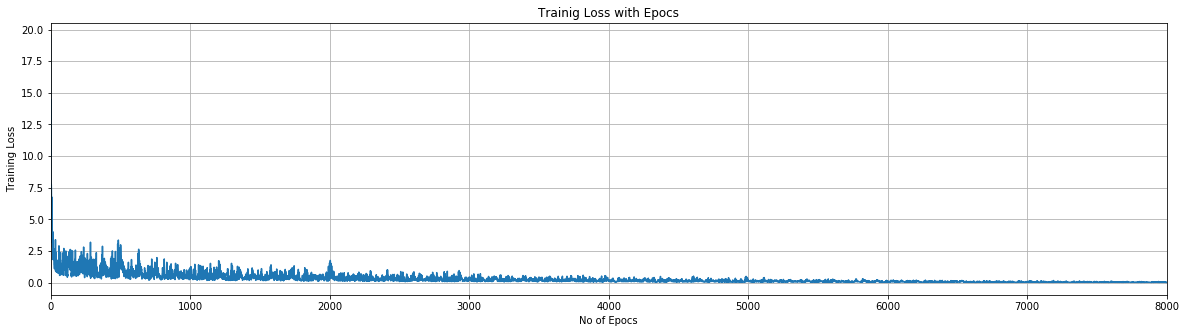

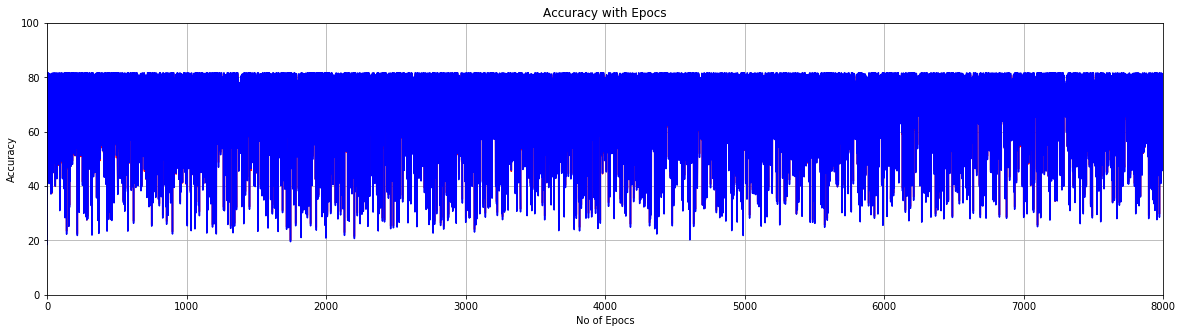

Total Accuracy 80.8935051389583


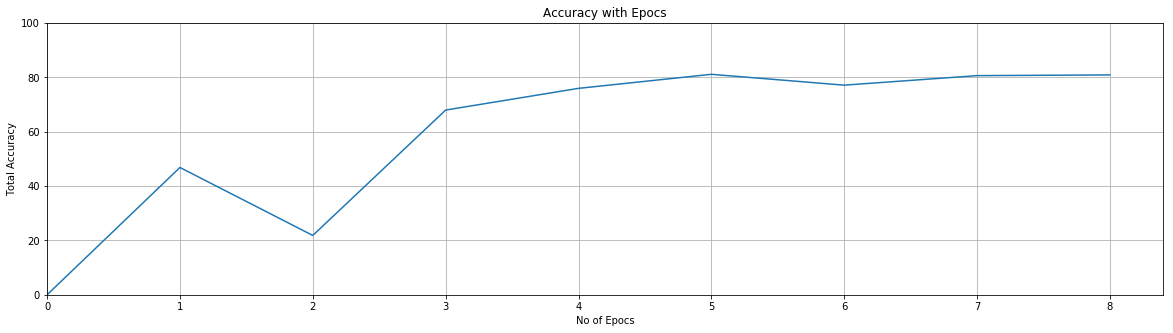

Model saved in file: C:\Users\arsha/model/model.ckpt-8000
Epoch 9000 completed out of 200000 loss: 1.8436877727508545 in: 0:00:51.038772 seconds Total training time elapsed: 0:07:28.956068
Train Accuracy:  [73.43882]  Test Accuracy: [72.86678]


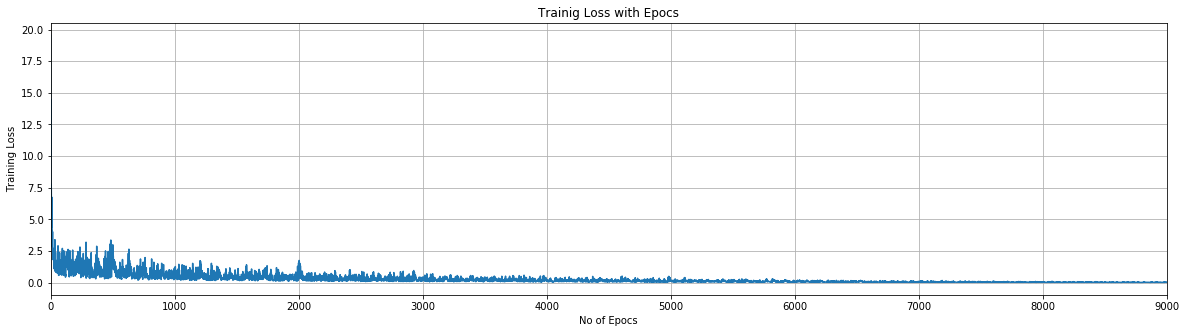

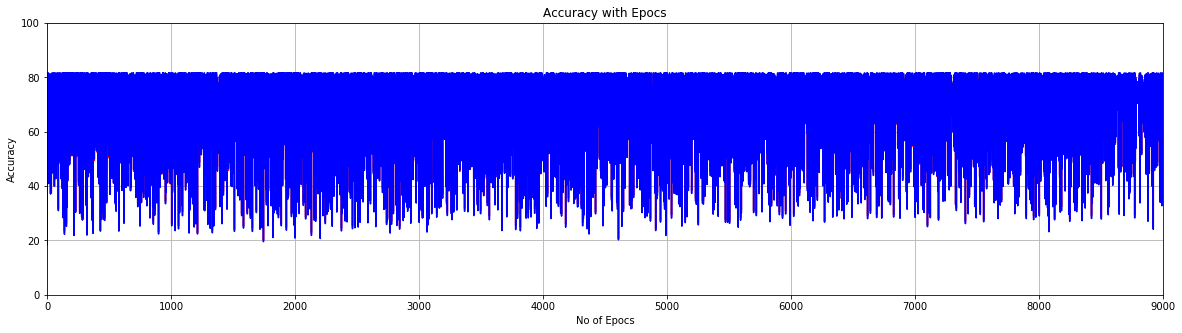

Total Accuracy 73.38171704221985


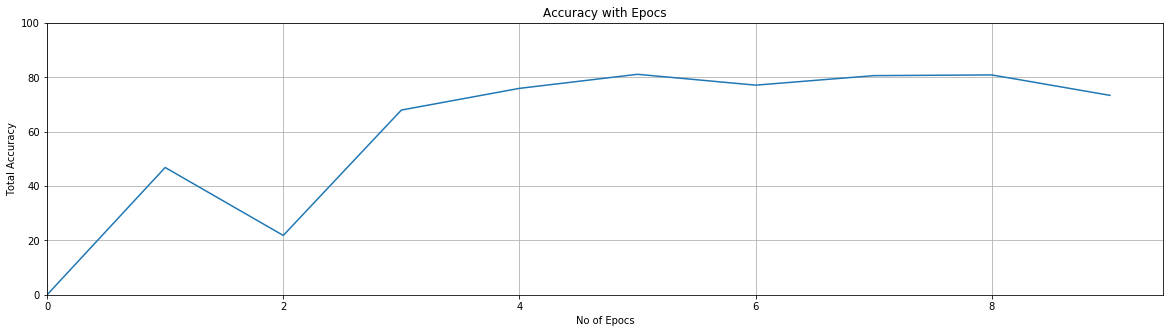

Model saved in file: C:\Users\arsha/model/model.ckpt-9000
Epoch 10000 completed out of 200000 loss: 0.5654833316802979 in: 0:00:51.514648 seconds Total training time elapsed: 0:08:20.470716
Train Accuracy:  [78.874886]  Test Accuracy: [79.11406]


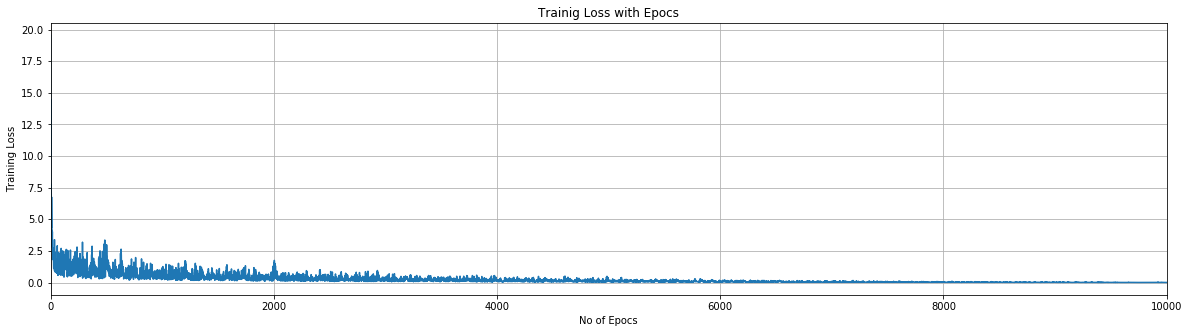

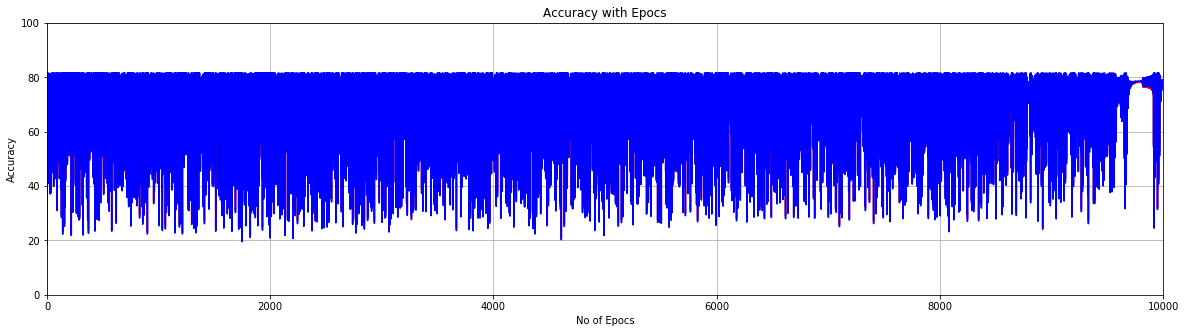

Total Accuracy 78.89876360791813


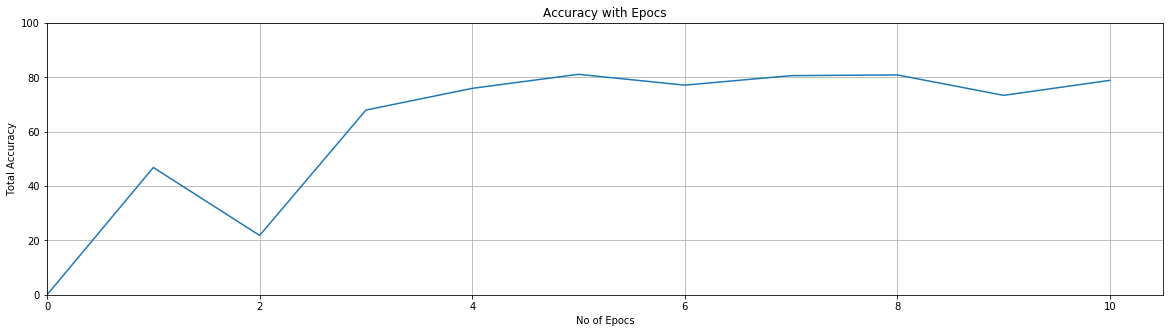

Model saved in file: C:\Users\arsha/model/model.ckpt-10000
Epoch 11000 completed out of 200000 loss: 0.5005446076393127 in: 0:00:51.247641 seconds Total training time elapsed: 0:09:11.718357
Train Accuracy:  [79.980446]  Test Accuracy: [79.95211]


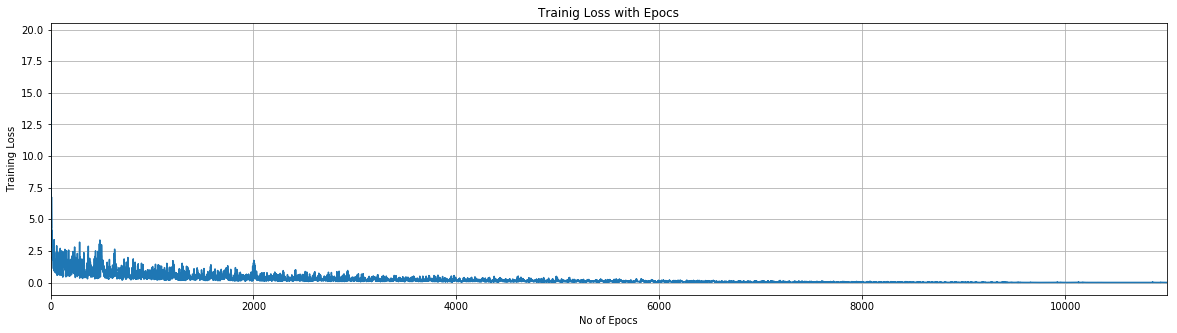

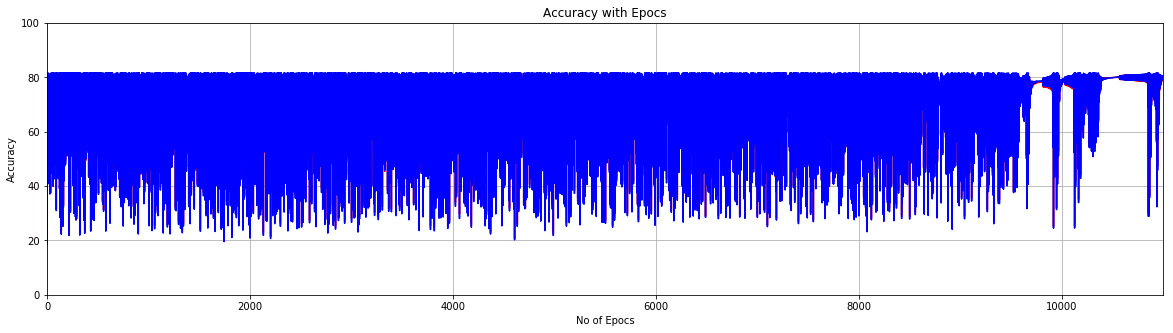

Total Accuracy 79.97761891310489


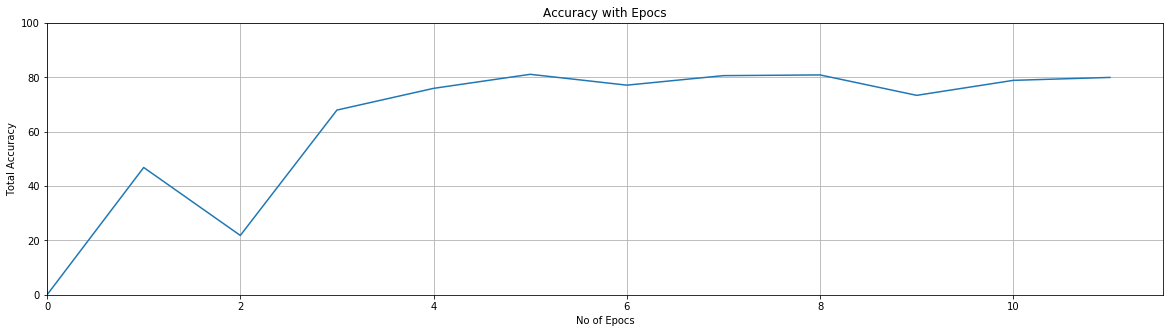

Model saved in file: C:\Users\arsha/model/model.ckpt-11000


In [ ]:
import datetime
print('Training started with below inputs')
print('Test Size              :',test_size)
print('Layers and Neurons     :',layers_neurons_input)
print('Batch Size             :',batch_size)
print('Number of Epocs        :',hm_epochs)
print('Activation Function    :',activation_function)
print('Cost Function          :',cost_function)
print('Base Learning Rate     :',base_learning_rate)
print('Decay Rate             :',decay_rate)
print('Iteration Save Model   :',iterations_save_model)
print('No of Training Records :',no_of_training_records)
print('\n')

# reset everything to rerun in jupyter
#tf.reset_default_graph()

# Optimizer: set up a variable that's incremented once per batch and
# controls the learning rate decay.
batch = tf.Variable(0)
#learning_rate = tf.train.exponential_decay(
 # base_learning_rate,                # Base learning rate.
  #batch * batch_size,  # Current index into the dataset.
  #inputXtrain.shape[0],# Decay step,train_size.
  #decay_rate,                # Decay rate.
  #staircase=True)

with tf.name_scope('Cost'):  
    if cost_function == 'softmax_cross_entropy_with_logits':
        cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=Y_),name='cross_entropy')
    elif cost_function == 'reduce_sum':
        cross_entropy = -tf.reduce_sum(output * tf.log(Y_))
    elif cost_function == 'RMSE':
        cross_entropy = tf.sqrt(tf.reduce_mean(tf.squared_difference(Y_[0],output[0])))
with tf.name_scope('Optimizer'):     
    #optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy,global_step = batch)
    optimizer = tf.train.AdamOptimizer(.001).minimize(cross_entropy)


# accuracy of the trained model, between 0 (worst) and 1 (best)
with tf.name_scope('Correct_Prdiction'):     
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(Y_, 1))

with tf.name_scope('Accuracy'):     
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32),name='Accuracy')*100

saver = tf.train.Saver()

config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True
sess = tf.Session(config=config) 
sess.run(tf.global_variables_initializer())
trainAccuracyList = list()
testAccuracyList = list()
lossList = list()


#saver.restore(sess,tf.train.latest_checkpoint(modelDir+'/.'))

# Merge all the summaries and write them out to /tmp/mnist_logs (by default)
#logs_path = 'C:/Arshad/Cognitive Banking/Training Data/Tensor Board'
# create a summary for our cost and accuracy
#tf.summary.scalar("Cost", cost)
#tf.summary.scalar("Accuracy", accuracy)

# merge all summaries into a single "operation" which we can execute in a session 
#summary_op = tf.summary.merge_all()

#merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter(tb_logs_path,sess.graph)

trainingStart = datetime.datetime.now()
timeStart = datetime.datetime.now()

for epoch in range(hm_epochs):
    epoch_loss = 0

    batch_count = int(inputXtrain.shape[0]/batch_size)
    for i in range(batch_count):
        epoch_x, epoch_y =  nextBatch(inputXtrain,i),  nextBatch(inputYtrain,i)
        #epoch_x, epoch_y =  inputXtrain,  inputYtrain
        _ , c = sess.run([optimizer,cross_entropy], feed_dict={X: epoch_x, Y_: epoch_y})
        epoch_loss += c   
        #train_writer.add_summary(summary, epoch =* batch_count + i)

    trainAcc = sess.run([accuracy], feed_dict={X: inputXtrain, Y_: inputYtrain})
    testAcc = sess.run([accuracy], feed_dict={X: inputXtest, Y_: inputYtest})
    lossList.append(epoch_loss/100)
    trainAccuracyList.append(trainAcc)
    testAccuracyList.append(testAcc)

    
    #print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss, 'in:',executionTime,'seconds Total training time elapsed:',timeEnd-trainingStart)
    #print('Train Accuracy: ',trainAcc,' Test Accuracy:',testAcc)
    
    if (epoch+1)%iterations_save_model==0:
        timeEnd = datetime.datetime.now()
        executionTime = timeEnd - timeStart
        timeStart = datetime.datetime.now()
        print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss, 'in:',executionTime,'seconds Total training time elapsed:',timeEnd-trainingStart)
        print('Train Accuracy: ',trainAcc,' Test Accuracy:',testAcc)
        lossGraph(epoch+1)
        accuracyGraph(epoch+1)
        testModel(epoch+1)
        save_path = saver.save(sess, modelPath,global_step=epoch+1)
        print("Model saved in file: %s" % save_path) 